In [2]:
# Libary Imports
import sys
import pandas as pd
import numpy as np
from scipy.stats import norm,t 
import matplotlib.pyplot as plt
import statsmodels.api as sm 

# Local Import
sys.path.insert(0, '../')
from utility import load_currency

In [3]:
# Load Data
df = load_currency('DASH',columns=['logclose'])
df.head()

,logclose
time,
2018-01-02 11:00:00,6.996672
2018-01-02 12:00:00,6.993116
2018-01-02 13:00:00,7.015380
2018-01-02 14:00:00,7.007057
2018-01-02 15:00:00,7.003320


Text(0, 0.5, 'Log Closing Price')

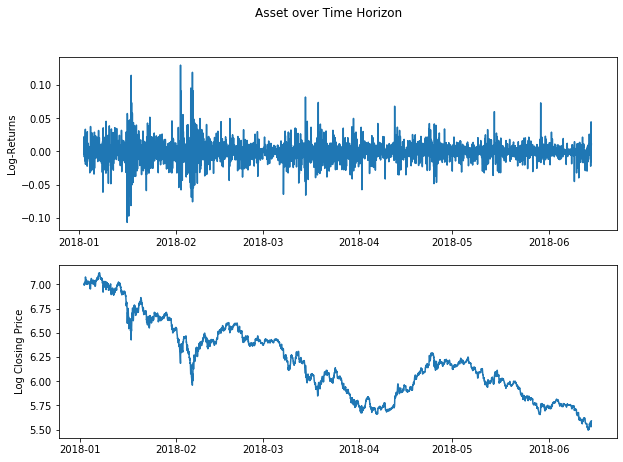

In [17]:
# Log Returns
r = df['logclose'].diff().dropna()
# r = r.resample('D').sum()

# Plotting
fig, ax = plt.subplots(2,figsize=(10,7))
fig.suptitle("Asset over Time Horizon")

ax[0].plot(r)
ax[0].set_ylabel('Log-Returns')

ax[1].plot(df['logclose'])
ax[1].set_ylabel('Log Closing Price')

### Standardized Moments

In [18]:
print(f'Number of Observations = {r.count()}')
print(f'Mean = {r.mean():.4f}')
print(f'Std. deviation = {r.std():.4f}')
print(f'Skewness = {r.skew():.4f}')
print(f'Excess kurtosis = {(r.kurt()-3):.4f}')

Number of Observations = 3919
Mean = -0.0004
Std. deviation = 0.0147
Skewness = 0.3951
Excess kurtosis = 5.8909


## Fit Normal and Student's t-Distribution to data

In [19]:
# Define point grid between min and max log return
nbins = 150
x = np.linspace(np.min(r),np.max(r),nbins) 

# MLE of Normal Distribuion
mean, std = norm.fit(r)
log_likelihood_norm = norm.logpdf(r,mean,std).sum()

# MLE of Student-t distribution
df, loc, scale  = t.fit(r)
log_likelihood_student = t.logpdf(r, df,loc,scale).sum()

print('Log-likelihood:')
print(f'Normal Distribution = {log_likelihood_norm:.2f}')
print(f'Students t-Distribution = {log_likelihood_student:.2f}')

Log-likelihood:
Normal Distribution = 10986.00
Students t-Distribution = 11560.98


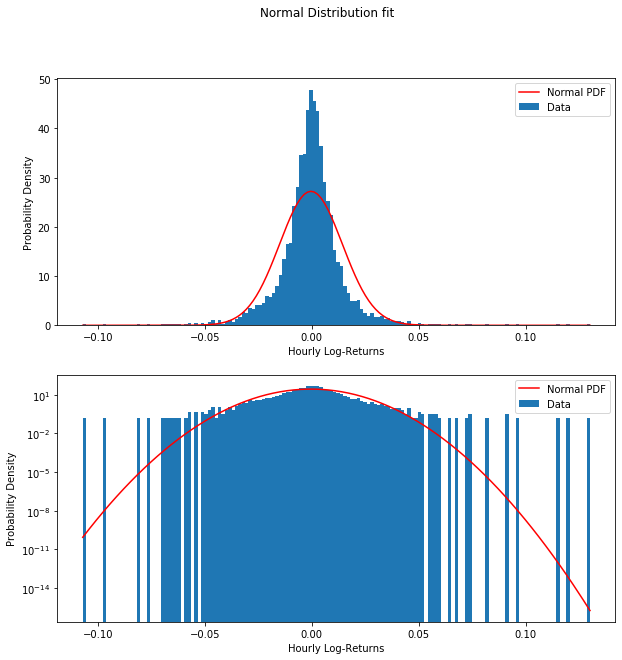

In [20]:
# Plot Empirical PDF vs Normal Distribution 
fig, ax = plt.subplots(2,figsize=(10,10))
fig.suptitle('Normal Distribution fit')

ax[0].hist(r,nbins,density=True,label='Data')
ax[0].plot(x,norm.pdf(x,loc = mean, scale = std),'r',label ='Normal PDF')
ax[0].set_ylabel('Probability Density')
ax[0].set_xlabel('Hourly Log-Returns')
ax[0].legend()

ax[1].hist(r,nbins,density=True,label='Data')
ax[1].plot(x,norm.pdf(x,loc = mean, scale = std),'r',label ='Normal PDF')
ax[1].set_ylabel('Probability Density')
ax[1].set_xlabel('Hourly Log-Returns')
ax[1].set_yscale('log')
ax[1].legend()

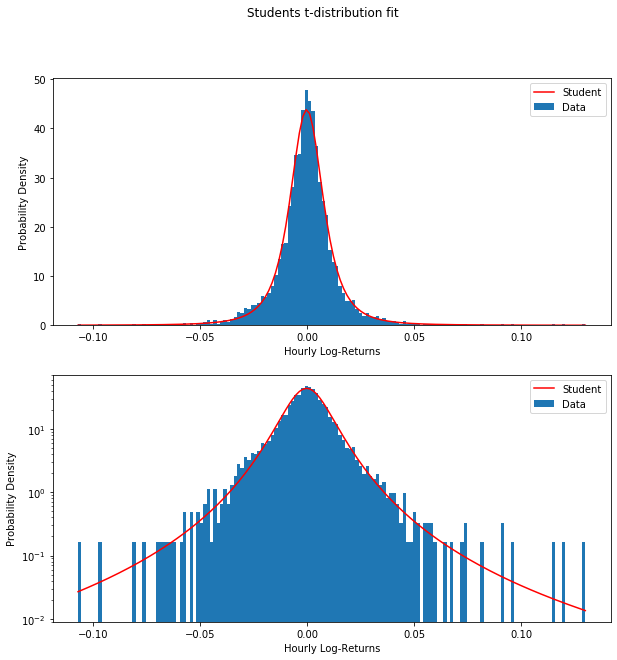

In [21]:
# Plot Empirical PDF vs Student's t-Distribution
fig, ax = plt.subplots(2,figsize=(10,10))
fig.suptitle('Students t-distribution fit')

ax[0].hist(r,nbins,density=True,label='Data')
ax[0].plot(x,t.pdf(x,loc = loc, scale = scale,df=df),'r',label ='Student')
ax[0].set_ylabel('Probability Density')
ax[0].set_xlabel('Hourly Log-Returns')
ax[0].legend()


ax[1].hist(r,nbins,density=True,label='Data')
ax[1].plot(x,t.pdf(x,loc = loc, scale = scale,df=df),'r',label ='Student')
ax[1].set_ylabel('Probability Density')
ax[1].set_xlabel('Hourly Log-Returns')
ax[1].set_yscale('log')
ax[1].legend()